In [25]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

In [26]:
sns.set(rc={'figure.figsize':(30,10)})

In [61]:
path = '/media/ke/8tb_part2/FSL_work/all/WH_1627_20171116_EDITS.txt'

In [62]:
endTidal = pd.read_csv(path, sep='\t|,', header=None, usecols=[0, 1, 2], index_col=False, engine='python')
endTidal = endTidal.rename(columns={0 : 'Time',
                                    1 : 'O2',
                                    2 : 'CO2'})
# need to scale CO2 data is necessary
if endTidal.CO2.max() < 1:
    endTidal.CO2 = endTidal.CO2 * 100

if endTidal.Time.max() < 20:
    endTidal.Time = endTidal.Time * 60
i = 0
diff = abs(endTidal.O2.iloc[i+1] - endTidal.O2.iloc[0])
while diff < 0.75:
    i += 1
    diff = abs(endTidal.O2.iloc[i+1] - endTidal.O2.iloc[0])

endTidal = endTidal[i:].reset_index(drop=True)

i = len(endTidal)-1
diff = abs(endTidal.O2.iloc[len(endTidal)-1] - endTidal.O2.iloc[i])
while diff < 0.75:
    i -= 1
    diff = abs(endTidal.O2.iloc[len(endTidal)-1] - endTidal.O2.iloc[i])

endTidal = endTidal[:i].reset_index(drop=True)

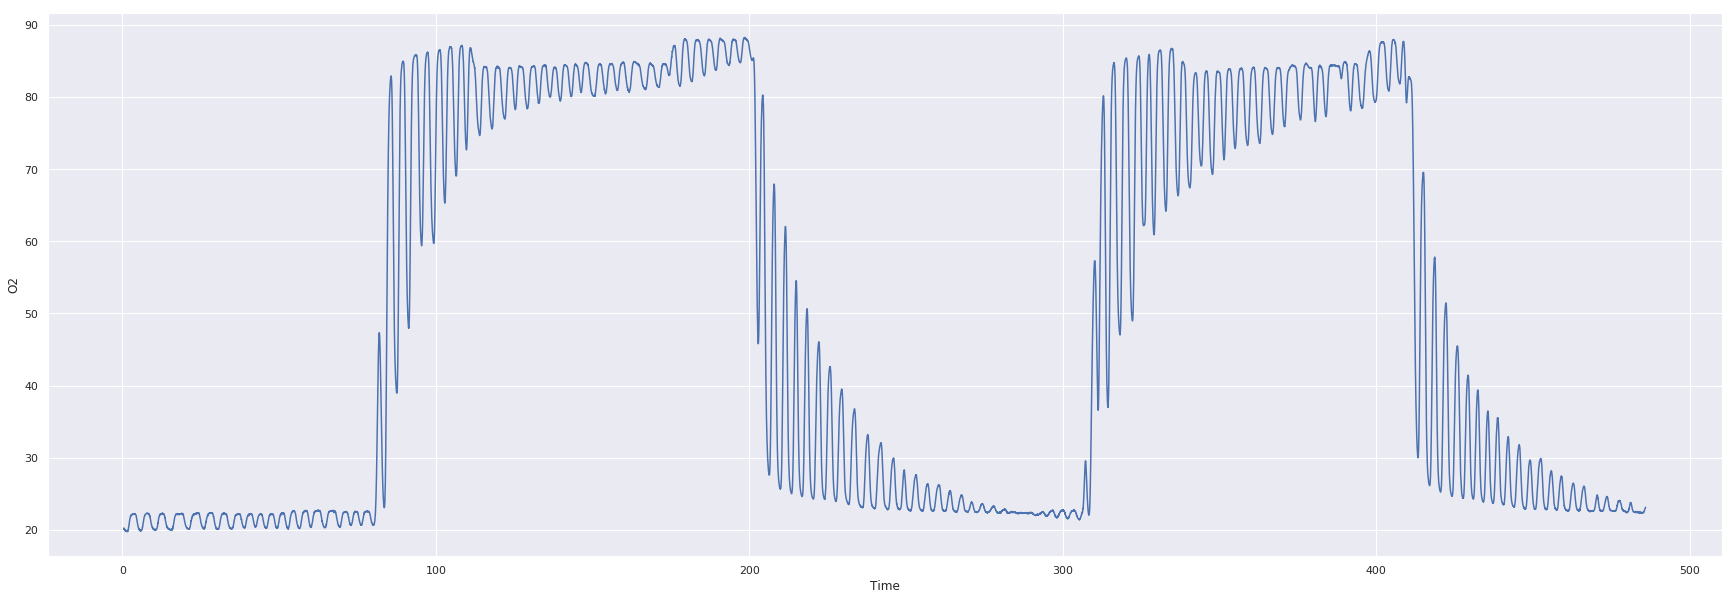

In [64]:
sns.lineplot(x='Time', y='O2', data=endTidal)
plt.show()

In [44]:
endTidal.CO2 = signal.detrend(endTidal.CO2)
endTidal.O2 = signal.detrend(endTidal.O2)

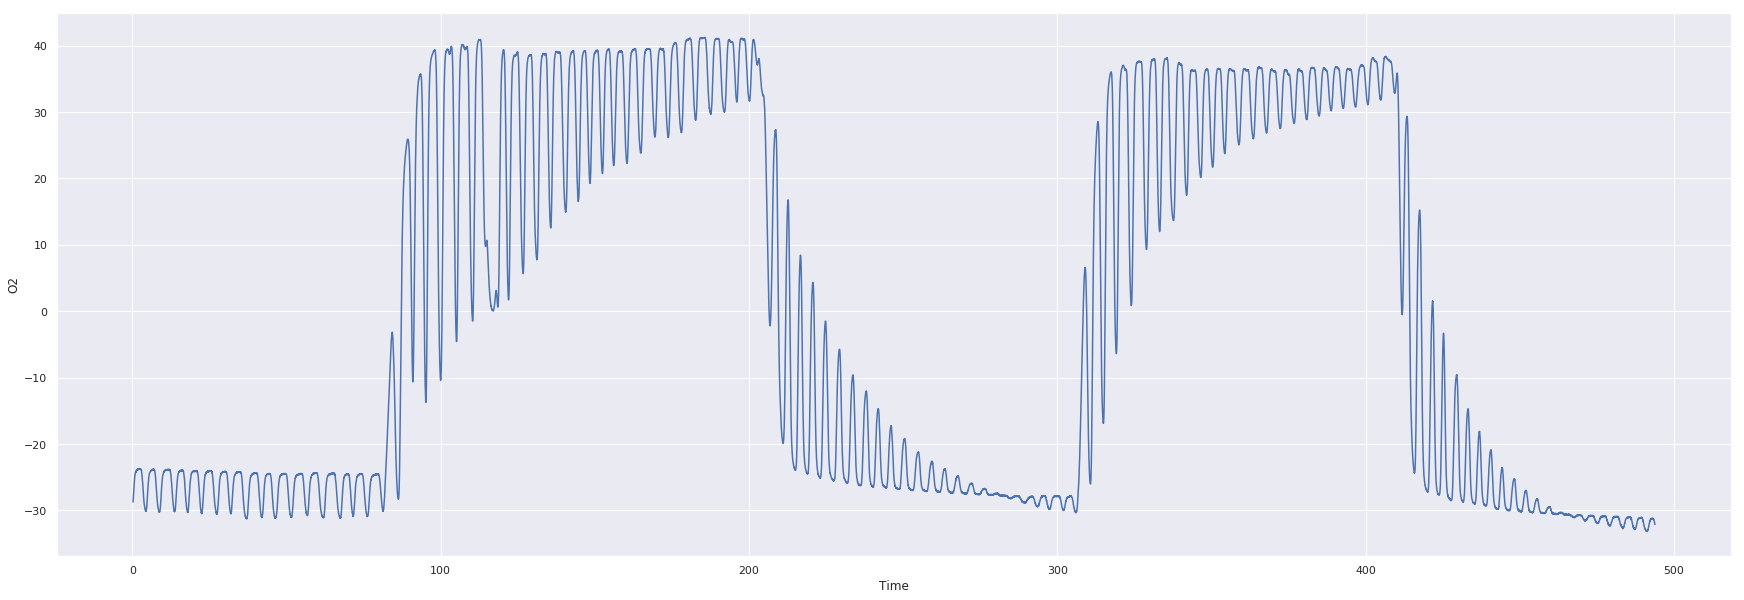

In [45]:
sns.lineplot(x='Time', y='O2', data=endTidal)
plt.show()